# Análise dos dados do Corona Vírus (SARS-CoV-2 / COVID-19)

Em fevereiro de 2020, a Johns Hopkins University liberou um dashboard com dados a respeito do coronavirus (na época ainda sem o nome da doença devidamente definido) https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

## Importando as bibliotecas

In [1]:
import math
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [19, 9]

## Carregando os dados

In [2]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
request_confirmed = requests.get(url_confirmed).content
df_confirmed = pd.read_csv(io.StringIO(request_confirmed.decode('utf-8')))

## Olhando os dados crus

Os dados que vem do arquivo (um `.csv`), são os seguintes:

In [3]:
df_confirmed.transpose()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,Falkland Islands (Malvinas),Saint Pierre and Miquelon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
Lat,33,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,-13.2543,-51.7963,46.8852,6.877,24.2155,0.18636,15.5527,-11.6455,38.861,-29.61
Long,65,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,34.3015,-59.5236,-56.3159,31.307,-12.8858,6.61308,48.5164,43.3333,71.2761,28.2336
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/24/20,29640,2114,12248,855,197,26,49851,21717,108,3162,...,941,13,1,1942,10,710,1015,265,5630,17
6/25/20,30175,2192,12445,855,212,65,52457,22488,108,3168,...,960,13,1,1942,10,711,1076,272,5691,17
6/26/20,30451,2269,12685,855,212,65,55343,23247,108,3174,...,1005,13,1,1942,10,712,1089,272,5747,24
6/27/20,30616,2330,12968,855,259,65,57744,23909,108,3177,...,1038,13,1,1942,10,713,1103,272,5799,24


## Analisando os dados

Olhando para os dados que temos, plotando a latitude e a longitude (variáveis `Lat` e `Long`), temos o seguinte:

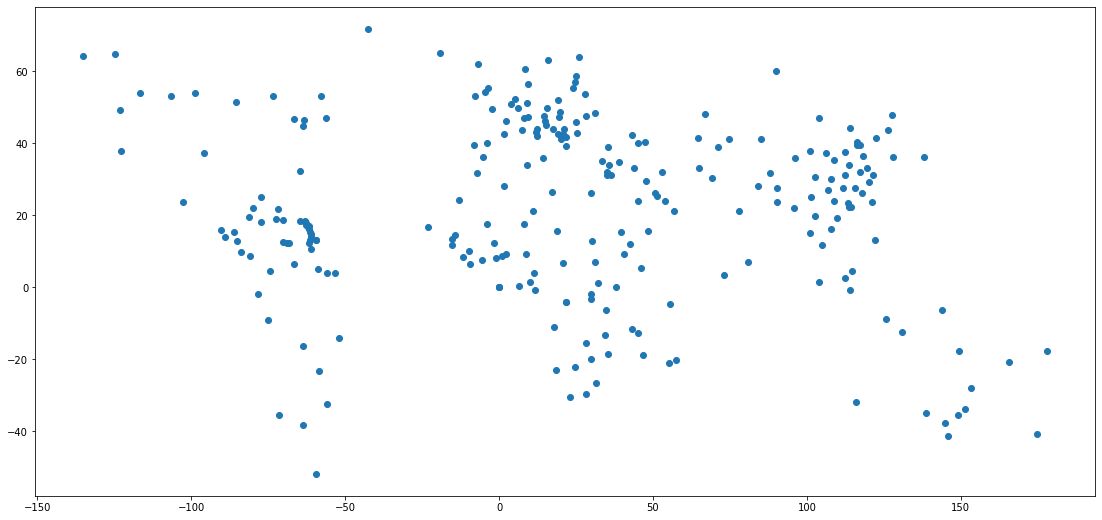

In [4]:
plt.scatter(df_confirmed.Long, df_confirmed.Lat)

## Olhando para os dados

### A escala logarítmica

Olhando para os dados, percebemos que existem diferenças em ordem de grandezas que fazem com que a variação não possa ser percebida tão claramente. Observe, por exemplo, os valores absolutos de casos confirmados na **Itália** e no **Brasil** (cada linha horizontal, neste caso, equivale a $5.000$ casos):

In [7]:
df_confirmed[df_confirmed['Country/Region'] == 'Brazil']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,1032913,1067579,1083341,1106470,1145906,1188631,1228114,1274974,1313667,1344143


In [8]:
brazil_index = df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].index[0]

In [9]:
brazil_index

28

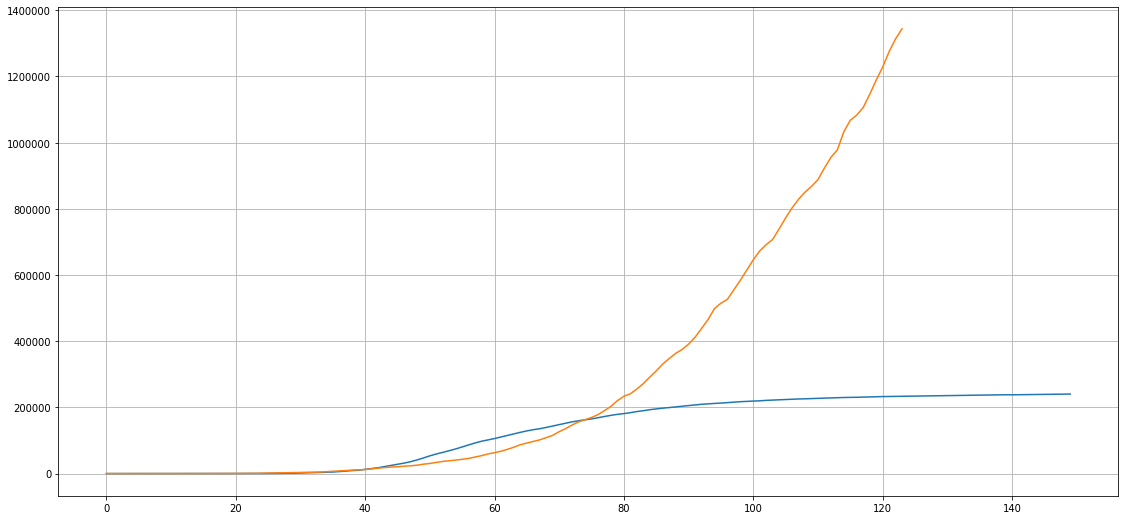

In [14]:
ax = (df_confirmed[df_confirmed['Country/Region'] == 'Italy'].transpose()[13:].astype(float)).reset_index()[137].plot()
(df_confirmed.iloc[brazil_index].transpose()[39:].astype(float)).reset_index()[brazil_index].plot(ax=ax, grid=True)

Agora, mostramos os mesmos dados, só que em escala logarítmica. Perceba que as diferenças dos números ficam mais claras. Neste caso, cada linha horizontal equivale a $10^{número\_da\_linha}$

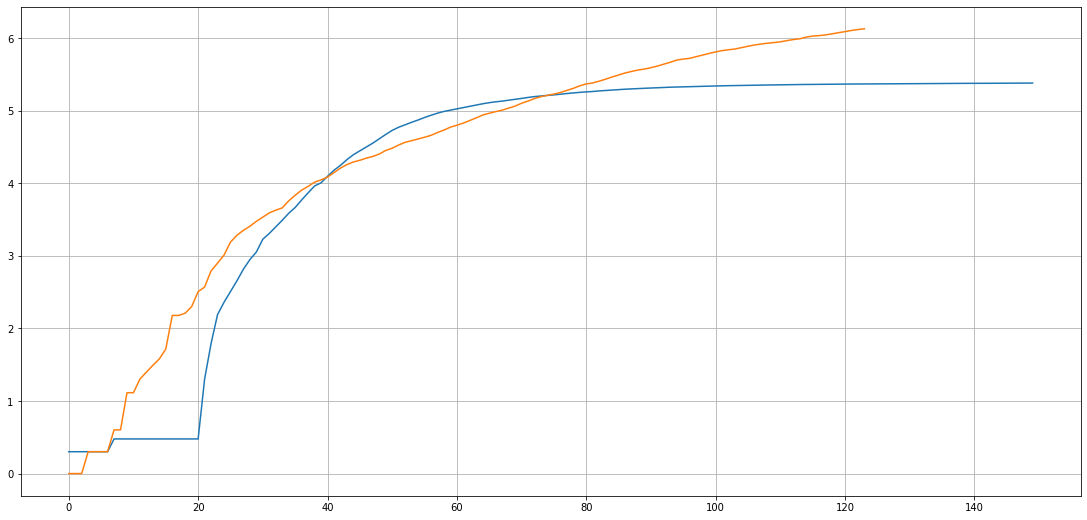

In [16]:
ax = np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Italy'].transpose()[13:].astype(float)).reset_index()[137].plot()
np.log10(df_confirmed.iloc[brazil_index].transpose()[39:].astype(float)).reset_index()[brazil_index].plot(ax=ax, grid=True, label=True)

## Brasil e China

Os dados do conjunto não possuem os dados do dia $0$ da China, então utilizamos o que temos:

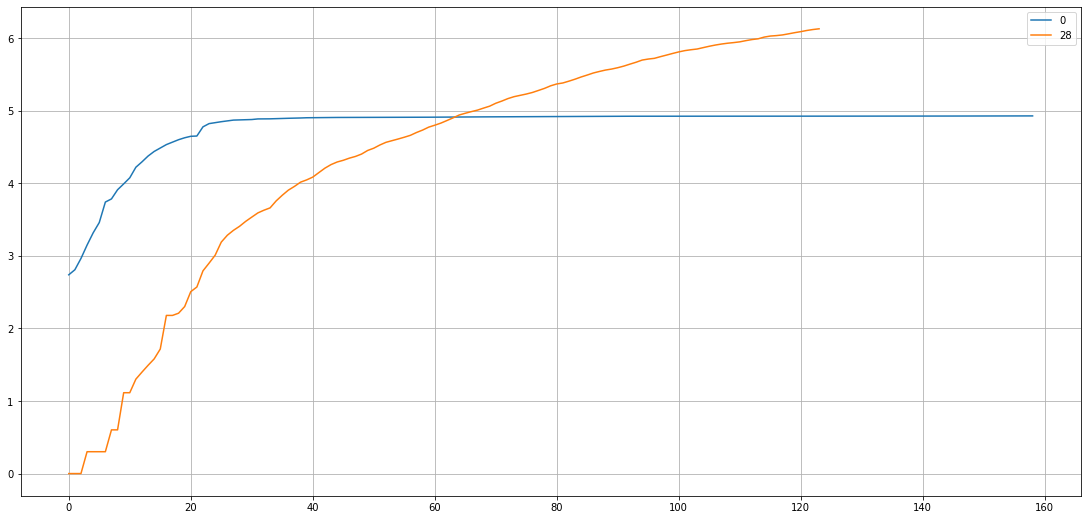

In [17]:
ax = np.log10(df_confirmed[df_confirmed['Country/Region'] == 'China'].sum().transpose()[4:].astype(float)).reset_index().plot()
np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index().plot(ax=ax, grid=True)

## Brasil e Espanha

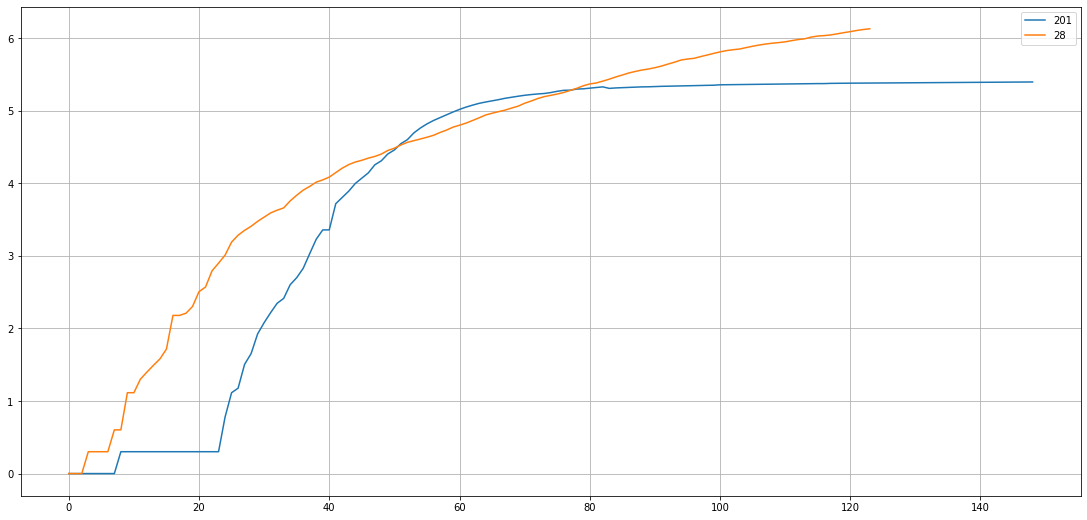

In [18]:
ax = np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Spain'].transpose()[14:].astype(float)).reset_index().plot()
np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index().plot(ax=ax, grid=True)

## Brasil e Itália

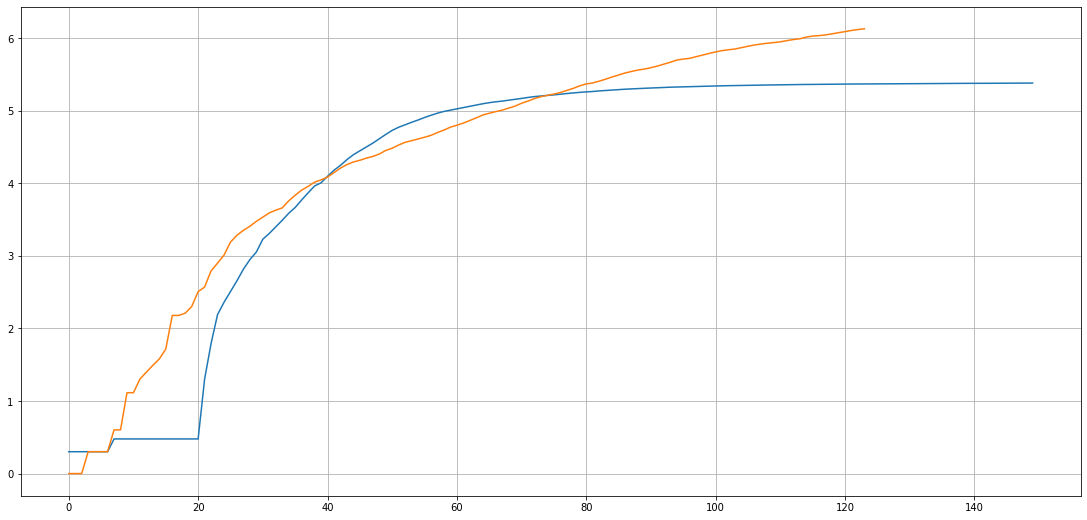

In [19]:
ax = np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Italy'].transpose()[13:].astype(float)).reset_index()[137].plot()
np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[28].plot(ax=ax, grid=True)

In [20]:
df_bra = df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float).reset_index()
#df_bra = (df_confirmed[df_confirmed['Country/Region'] == 'China'].sum().transpose()[4:].astype(float)).reset_index()
#np.log10(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index().plot(ax=ax, grid=True)

In [21]:
df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)

,28
2/26/20,1.0
2/27/20,1.0
2/28/20,1.0
2/29/20,2.0
3/1/20,2.0
...,...
6/24/20,1188631.0
6/25/20,1228114.0
6/26/20,1274974.0
6/27/20,1313667.0


In [22]:
df_bra[28]

0            1.0
1            1.0
2            1.0
3            2.0
4            2.0
         ...    
119    1188631.0
120    1228114.0
121    1274974.0
122    1313667.0
123    1344143.0
Name: 28, Length: 124, dtype: float64

In [23]:
df_l = []
for i in range (1, len(df_bra[28])):
    df_l.append(df_bra[28][i] - df_bra[28][i - 1])

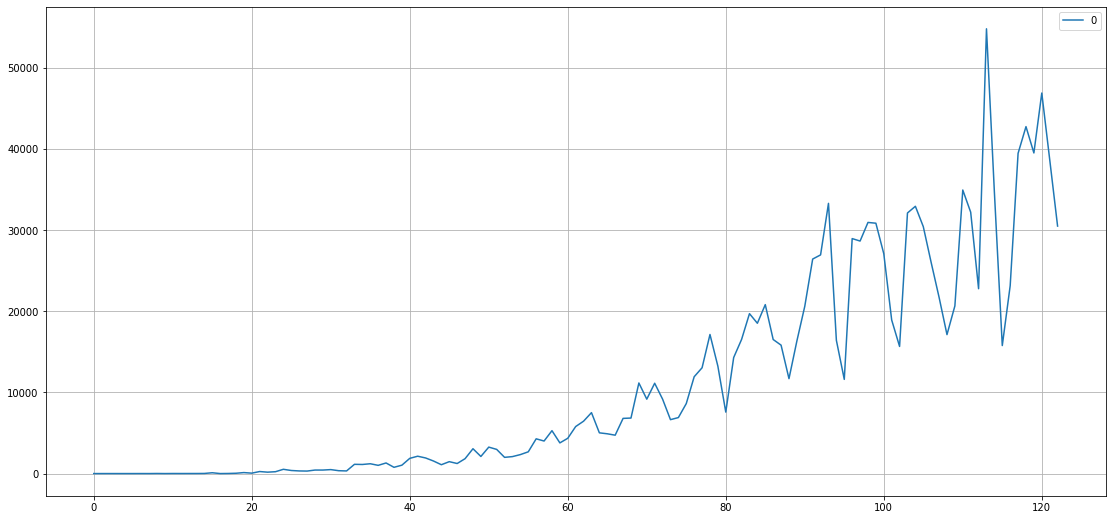

In [24]:
pd.DataFrame(df_l).plot(grid=True)

In [27]:
pd.DataFrame(df_l).sum()

0    1344142.0
dtype: float64

124

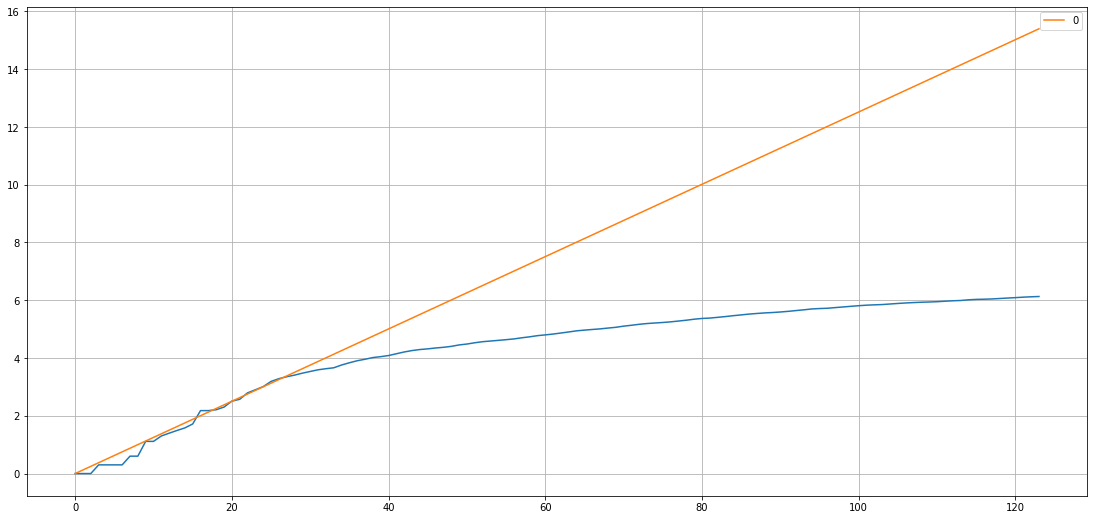

In [41]:
artificial_data = []
for x in range(0, df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].size):
    artificial_data.append(pow(math.exp(1), x/3.47))
    
ax = np.log10((df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[28]).plot(grid=True)
np.log10(pd.DataFrame(artificial_data)).plot(ax=ax, grid=True)

In [42]:
from scipy.optimize import curve_fit

In [43]:
def eexp(x, a, b):
    return pow(math.exp(1), (a / b) * x)

In [44]:
popt, pco = curve_fit(eexp, xdata=list(range(0, df_confirmed.shape[1] - 39)), ydata=list((df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[28]))

In [45]:
popt[1]/popt[0]

8.478357174193242

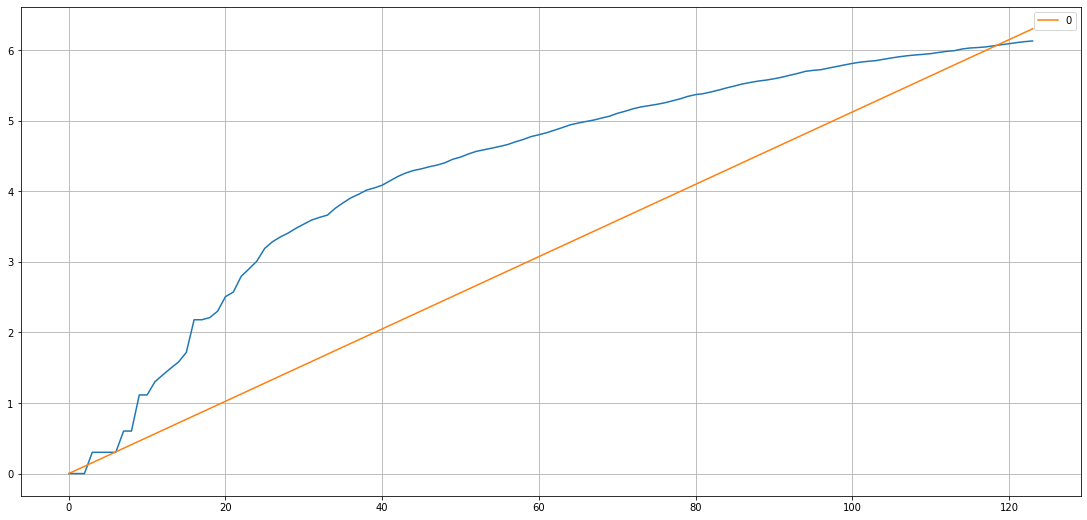

In [47]:
artificial_data = []
for x in range(0, df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].size):
    artificial_data.append(pow(math.exp(1), x/(popt[1]/popt[0])))
    
ax = np.log10((df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[28]).plot(grid=True)
np.log10(pd.DataFrame(artificial_data)).plot(ax=ax, grid=True)

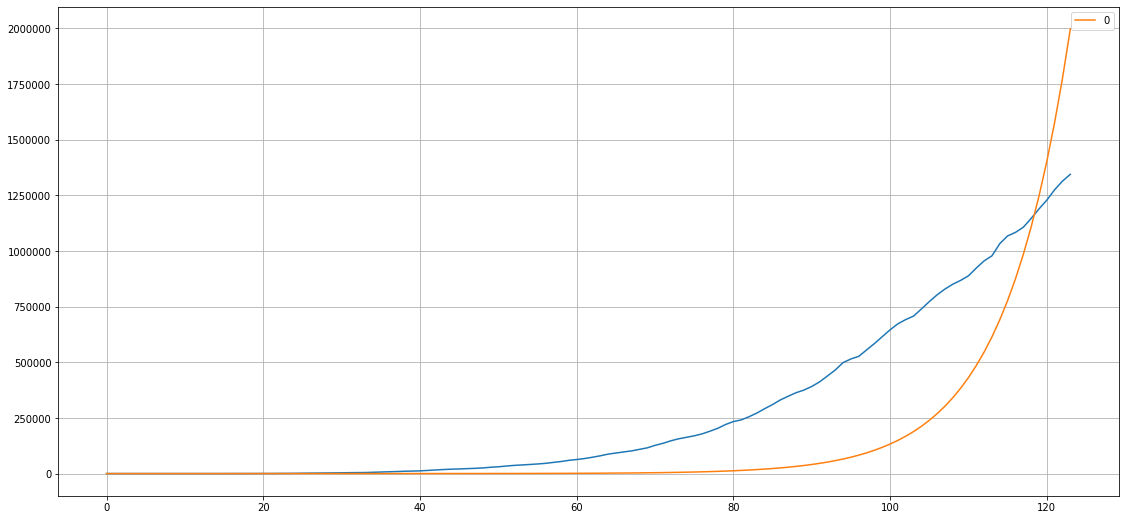

In [48]:
ax = ((df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[28]).plot(grid=True)
(pd.DataFrame(artificial_data)).plot(ax=ax, grid=True)

In [27]:
(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[28]

0         1.0
1         1.0
2         1.0
3         2.0
4         2.0
       ...   
58    54043.0
59    59324.0
60    63100.0
61    67446.0
62    73235.0
Name: 28, Length: 63, dtype: float64

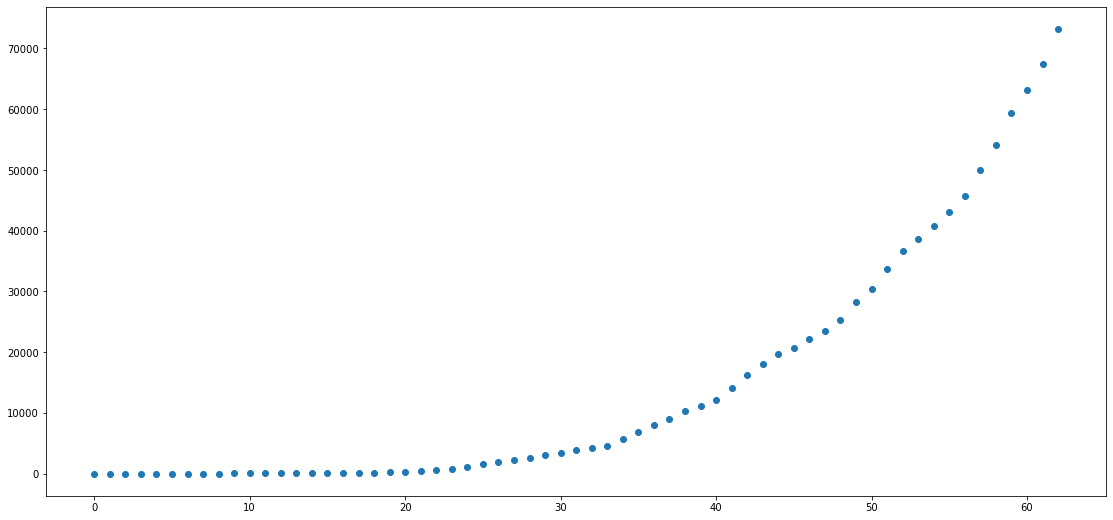

In [30]:
plt.scatter(list(range(0, 63)), ((df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()[28]))

In [29]:
(df_confirmed[df_confirmed['Country/Region'] == 'Brazil'].transpose()[39:].astype(float)).reset_index()

,index,28
0,2/26/20,1.0
1,2/27/20,1.0
2,2/28/20,1.0
3,2/29/20,2.0
4,3/1/20,2.0
...,...,...
58,4/24/20,54043.0
59,4/25/20,59324.0
60,4/26/20,63100.0
61,4/27/20,67446.0
